<a href="https://colab.research.google.com/github/jan3011/Prediction-of-Parkinson-disease/blob/master/Predictive_KNN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving demographics.csv to demographics (3).csv
[[7.200e+01 1.700e+00 8.200e+01 ... 1.047e+01 8.480e-01 9.370e-01]
 [5.300e+01 1.670e+00 5.400e+01 ... 1.834e+01 6.770e-01 5.790e-01]
 [6.800e+01 1.630e+00 5.700e+01 ... 1.011e+01 1.046e+00 2.280e-01]
 ...
 [6.700e+01 1.900e+00 9.500e+01 ... 1.252e+01 1.120e+00 1.000e-02]
 [6.100e+01 1.700e+00 7.200e+01 ... 1.265e+01 9.900e-01 1.000e-02]
 [5.300e+01 1.700e+00 8.700e+01 ... 1.141e+01 1.290e+00 1.000e-02]]
[[ 2  0  5]
 [ 0 15  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

          Ga       1.00      0.29      0.44         7
          Ju       1.00      1.00      1.00        15
          Si       0.69      1.00      0.81        11

    accuracy                           0.85        33
   macro avg       0.90      0.76      0.75        33
weighted avg       0.90      0.85      0.82        33



Text(0, 0.5, 'Mean Error')

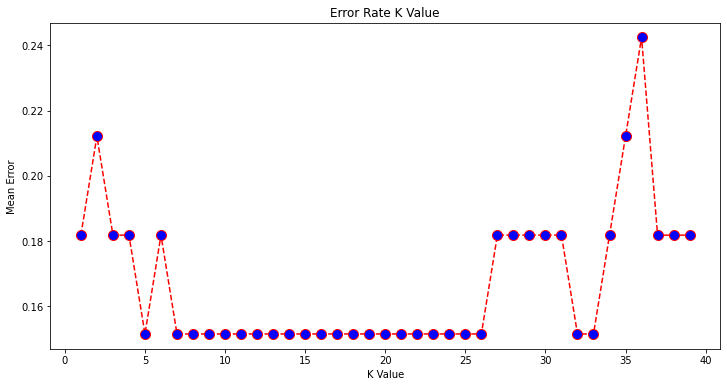

In [0]:
import numpy as np
import matplotlib.pyplot  as plt
import pandas as pd
from google.colab import files
data=files.upload()

data_df1=pd.read_csv('demographics.csv')
data_df=data_df1.iloc[3:]



#data_df.head()
x = data_df.iloc[:-1,[5,6,7,8,9,10,11,12,13]].values
y=data_df.iloc[:-1,1].values
print(x)


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)



from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)

classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')


